In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [140]:
# Create update function for mu
def update_mu(n, ybar, sig2, mu0, sig20):
    mu_param_num = (((n*ybar) / sig2) + (mu0/sig20))
    mu_param_dem = ((n/sig2) + (1/sig20))
    
    mu_param = mu_param_num / mu_param_dem
    sig_param = 1 / ((n/sig2) + (1/sig20))
    
    return np.random.normal(size=1, loc=mu_param, scale=sig_param)

# Create update function for sigma
def update_sigma(nu0, n, beta0, y, mu):
    shape_param = (n/2) + nu0
    sum_sq_diff = np.sum((np.array(y) - mu)**2)
    rate_param = ((1/2.) * (sum_sq_diff))
    
    # Inverse Gamma PDF
    return 1/ np.random.gamma(size=1, shape=shape_param, scale=rate_param)

# Create data vector and vars for n, y_bar, and values for prior_init.
y = np.array([1.2, 1.4, -0.5, 0.3, 0.9, 2.3, 1.0, 0.1, 1.3, 1.9])

prior_init = {
    
    'mu0': 0.0,
    'sig20': 1.0,
    'nu0': 1.0,
    'beta0': 1.0
}

# Create gibbs sampler.
def gs(y, prior_init, n_iter):
    
    n = len(y)
    y_bar = np.mean(y)
    
    mu_now = 0.5
    
    output_values = []
    
    for i in range(n_iter):
    
        sig_now = update_sigma(nu0 = prior_init['nu0'], 
                               n=n, 
                               beta0 = prior_init['beta0'], 
                               y=y, 
                               mu=mu_now)

        mu_now = update_mu(n=n, 
                           ybar=y_bar, 
                           sig2=sig_now, 
                           mu0 = prior_init['mu0'], 
                           sig20 = prior_init['sig20'])
        
        out = np.array([sig_now, mu_now])
        output_values.append(out)
    return output_values

In [156]:
sig = [each[0][0] for each in gs(y=y, prior_init=prior_init, n_iter=10000)]
mu = [each[1][0] for each in gs(y=y, prior_init=prior_init, n_iter=10000)]

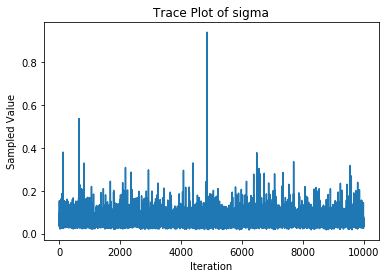

In [165]:
plt.plot(sig)
plt.title('Trace Plot of sigma')
plt.xlabel('Iteration')
plt.ylabel('Sampled Value')
plt.show()

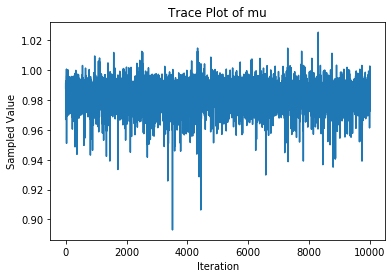

In [164]:
plt.plot(mu)
plt.title('Trace Plot of mu')
plt.xlabel('Iteration')
plt.ylabel('Sampled Value')
plt.show()

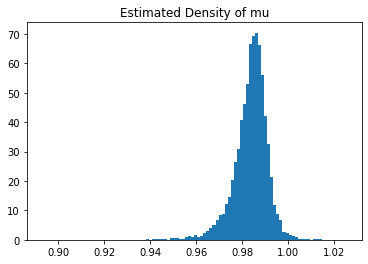

In [175]:
plt.hist(mu, density=True, bins=100)
plt.title('Estimated Density of mu')
plt.show()

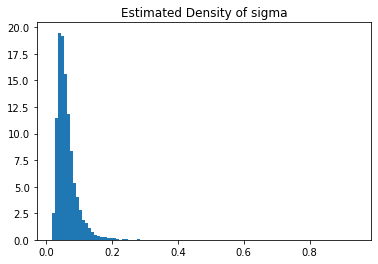

In [171]:
plt.hist(sig, density=True, bins=100)
plt.title('Estimated Density of sigma')
plt.show()

In [ ]:
# Need to validate MCMC